In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
xTrain = np.array([
    [2.5,-1],
    [1,1],
    [1,2],
    [2,1],
    [2,2],
    [1,3],
    [3,2],
    [3,3],], dtype=np.float32)


In [ ]:
yTrain = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [1],
    [1],], dtype=np.float32)

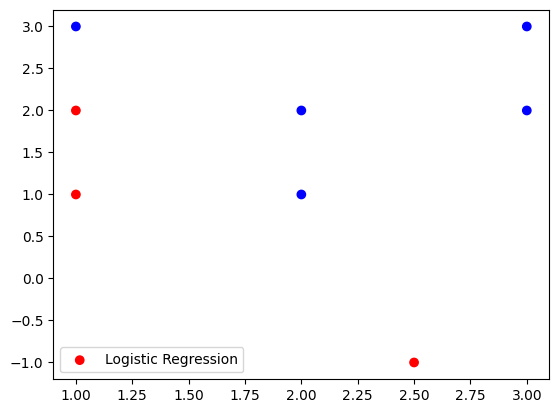

In [ ]:
colors=['red' if i == 0 else 'blue' for i in yTrain]
plt.scatter(xTrain[:,0], xTrain[:,1], label="Logistic Regression", color=colors)
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(2024)

#1. Parameter 설정
W = tf.Variable(tf.random.normal([2,1], mean=0.0))
B = tf.Variable(tf.random.normal([1], mean=0.0))

print("w:",W,"b:",B)

# Hypothesis 설정
def hypothesis(x):
  z = tf.matmul(x,W) + B
  sigmoid = 1 / (1+tf.exp(-z))
  return sigmoid

# Cost 설정
def costFunction(H,Y):
  crossEntropy = Y * tf.math.log(H) + (1-Y) * tf.math.log(1-H)
  cost = -tf.reduce_mean(crossEntropy)
  return cost

# Optimizer 설정
learningRate = 0.001
optimizer = tf.optimizers.AdamW(learningRate)

w: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.4306668],
       [0.1564775]], dtype=float32)> b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.0379024], dtype=float32)>


In [ ]:
# Training
for step in range(10001):
  with tf.GradientTape() as g:
    pred = hypothesis(xTrain)
    cost = costFunction(pred,yTrain)

  gradients = g.gradient(cost, [W,B])
  optimizer.apply_gradients(zip(gradients,[W,B]))

  if step % 500 == 0:
    print("step:", step, "cost:", cost)

  WHat = W.numpy()
  BHat = B.numpy()


step: 0 cost: tf.Tensor(0.5781796, shape=(), dtype=float32)
step: 500 cost: tf.Tensor(0.44478795, shape=(), dtype=float32)
step: 1000 cost: tf.Tensor(0.39296043, shape=(), dtype=float32)
step: 1500 cost: tf.Tensor(0.3581974, shape=(), dtype=float32)
step: 2000 cost: tf.Tensor(0.33122784, shape=(), dtype=float32)
step: 2500 cost: tf.Tensor(0.3086427, shape=(), dtype=float32)
step: 3000 cost: tf.Tensor(0.28907022, shape=(), dtype=float32)
step: 3500 cost: tf.Tensor(0.27175933, shape=(), dtype=float32)
step: 4000 cost: tf.Tensor(0.25621825, shape=(), dtype=float32)
step: 4500 cost: tf.Tensor(0.24210626, shape=(), dtype=float32)
step: 5000 cost: tf.Tensor(0.2291773, shape=(), dtype=float32)
step: 5500 cost: tf.Tensor(0.21725243, shape=(), dtype=float32)
step: 6000 cost: tf.Tensor(0.20619214, shape=(), dtype=float32)
step: 6500 cost: tf.Tensor(0.19589096, shape=(), dtype=float32)
step: 7000 cost: tf.Tensor(0.18626413, shape=(), dtype=float32)
step: 7500 cost: tf.Tensor(0.17724201, shape=(),

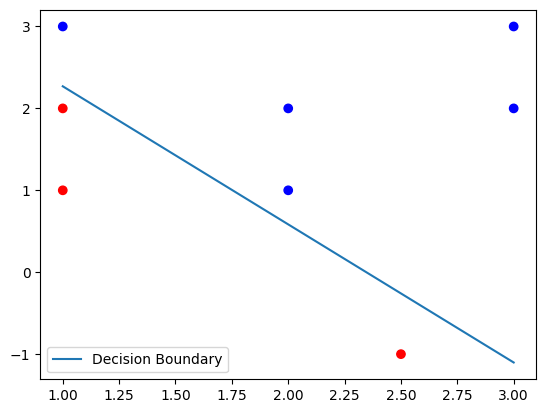

In [ ]:
slope = WHat[0] / WHat[1]

xx = np.linspace(np.min(xTrain[:,0]), np.max(xTrain[:,0]))
yy = -slope * xx - BHat/WHat[1]

colors = ["red" if i == 0 else "blue" for i in yTrain[:,0]]
plt.scatter(xTrain[:,0], xTrain[:,1], color = colors)
plt.plot(xx,yy, label="Decision Boundary")
plt.legend()
plt.show()

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_actual = [1,1,0,1,0,0,1,0,0,0]
y_predicted = [1,0,0,1,0,0,1,1,1,0]
CM = confusion_matrix(y_actual, y_predicted)
print('Confusion Matrix = \n', CM)

Confusion Matrix = 
 [[4 2]
 [1 3]]


In [ ]:
# Visualization
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False, title="confusion matrix", cmap=plt.cm.Blues):
  import itertools
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color="white" if cm[i,j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Confusion matrix without normalization
[[4 2]
 [1 3]]


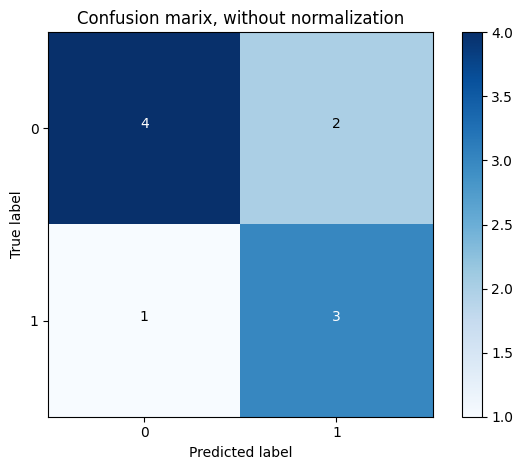

In [ ]:
import numpy as np

cnf_matrix = confusion_matrix(y_actual, y_predicted, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion marix, without normalization')

In [ ]:
print("Accuracy = ", accuracy_score(y_actual, y_predicted))
print("Report = \n", classification_report(y_actual,y_predicted))

Accuracy =  0.7
Report = 
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



# **Multi-Class Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
classes = ['Cat', 'Dog', 'Rabbit']

y_actual = ['Cat', 'Dog', 'Rabbit', 'Cat', 'Cat', 'Rabbit']
y_predicted = ['Dog', 'Dog', 'Rabbit', 'Dog', 'Dog', 'Rabbit']

CM = confusion_matrix(y_actual, y_predicted)
print('Confusion matrix = \n', CM)

Confusion matrix = 
 [[0 3 0]
 [0 1 0]
 [0 0 2]]


In [ ]:
# Visualization

import matplotlib.pyplot as plt

def plotCM(cm, classes, normalization=False, title="Confusion Matrix", cmap=plt.cm.Reds):
  import itertools
  if normalization:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Noramlized confusion matrix')
  else:
    print("Without Normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalization else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")


    plt.ylabel("True")
    plt.xlabel("Prediction")
    plt.tight_layout()

Without Normalization
[[0 3 0]
 [0 1 0]
 [0 0 2]]


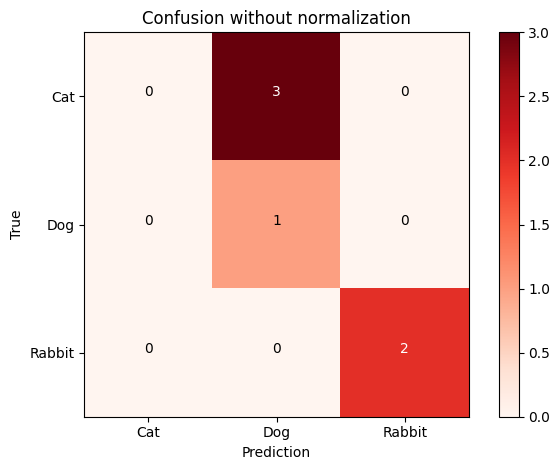

In [ ]:
import numpy as np

confusion = confusion_matrix(y_actual, y_predicted, labels=['Cat', 'Dog', 'Rabbit'])
np.set_printoptions(precision=2)

plt.figure()
plotCM(confusion, classes=['Cat', 'Dog', 'Rabbit'],
       title='Confusion without normalization')